# <center><u>Support Vector Machines (SVM)</u></center>


Support vector machine is another simple algorithm that every machine learning expert should have in his/her arsenal. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks. But, it is widely used in classification objectives.


## Data Understanding

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the data, use seperation as comma(,) and header as None

email_rec = pd.read_csv("/content/Spam.csv", sep=",", header=None)


In [3]:
email_rec.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
2,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
3,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1


In [4]:
#renaming the columns
column_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

email_rec.columns = column_names


In [5]:
email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
2,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
3,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1


In [6]:
email_rec = email_rec.iloc[1:].reset_index(drop=True)

email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1


In [7]:
email_rec.shape

(4601, 58)

In [8]:
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   word_freq_make              4601 non-null   object
 1   word_freq_address           4601 non-null   object
 2   word_freq_all               4601 non-null   object
 3   word_freq_3d                4601 non-null   object
 4   word_freq_our               4601 non-null   object
 5   word_freq_over              4601 non-null   object
 6   word_freq_remove            4601 non-null   object
 7   word_freq_internet          4601 non-null   object
 8   word_freq_order             4601 non-null   object
 9   word_freq_mail              4601 non-null   object
 10  word_freq_receive           4601 non-null   object
 11  word_freq_will              4601 non-null   object
 12  word_freq_people            4601 non-null   object
 13  word_freq_report            4601 non-null   obje

In [9]:
# check for missing values

email_rec.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [10]:
# look at fraction of spam emails
percentage = (email_rec['spam'].value_counts()/email_rec.shape[0])*100
percentage


,count
spam,
0,60.595523
1,39.404477


We can see that we have 40% of spam mails and 60% of ham

## Data Prepration

In [11]:
email_rec = email_rec.apply(pd.to_numeric, errors='ignore')

email_rec.describe()


<ipython-input-11-a28df5b1ef6e>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  email_rec = email_rec.apply(pd.to_numeric, errors='ignore')


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Spliting the dataset

In [12]:
X = email_rec.drop('spam', axis=1)

y = email_rec['spam']

#### Scaling the features

We will Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

x = x-mean(x)/std(x)

In [13]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform X (assuming X is your feature matrix)
X = scaler.fit_transform(X)



In [14]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (30% test size, 70% train size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)


## Model Building

Firstly we are going to use the default kernal i.e RBF

In [15]:
from sklearn.svm import SVC

# Instantiate an object of class SVC with cost parameter C=1
model = SVC(C=1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred_rbf = model.predict(X_test)



##### Evaluate the model using confusion matrix

In [16]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_rbf))


[[811  38]
 [ 61 471]]


#### Print other metrics

In [17]:
# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_rbf)
print("Accuracy:", accuracy)

# Precision
precision = metrics.precision_score(y_test, y_pred_rbf)
print("Precision:", precision)

# Recall (Sensitivity)
recall = metrics.recall_score(y_test, y_pred_rbf)
print("Recall (Sensitivity):", recall)


Accuracy: 0.9283128167994207
Precision: 0.925343811394892
Recall (Sensitivity): 0.8853383458646616


In [18]:
# Calculate specificity (True Negative Rate)

# Get the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_rbf)

# Extract TN (True Negatives) and FP (False Positives)
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives

# Calculate specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


Specificity: 0.9552414605418139


### Interpretation of Results

In the confusion matrix, the elements at (0, 0) and (1,1) correspond to the more frequently occurring class, i.e. ham emails. Thus, it implies that:
- 92% of all emails are classified correctly
- 88.5% of spams are identified correctly (sensitivity/recall)
- Specificity, or % of hams classified correctly, is 95%


### K-Fold Cross Validation

Let's first run a simple k-fold cross validation to get a sense of the **average metrics** as computed over multiple *folds*. the easiest way to do cross-validation is to use the ```cross_val_score()``` function.

In [19]:
from sklearn.model_selection import KFold

# Creating a KFold object with 5 splits, shuffle=True, and random_state=4
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Instantiating an SVC model with cost (C=1) and random_state=4
model = SVC(C=1, random_state=4)


In [20]:
from sklearn.model_selection import cross_val_score

# Computing the cross-validation scores
cv_results = cross_val_score(model, X, y, cv=folds, scoring='accuracy')




In [21]:
# Print the 5 accuracies from cross-validation
print("Cross-validation scores from 5 folds:", cv_results)

# Print the mean accuracy across all 5 folds
print("Mean accuracy:", cv_results.mean())


Cross-validation scores from 5 folds: [0.92616721 0.93152174 0.93695652 0.93586957 0.92065217]
Mean accuracy: 0.9302334419109662


K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have.

## Hyperparameter Tuning
### Grid Search to Find Optimal Hyperparameter C

Now we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.)

In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

In [22]:
from sklearn.model_selection import GridSearchCV

# Specify range of parameters (C) as a list
params = {'C': [0.1, 1, 10, 100, 1000]}

# Initialize SVC
model = SVC()

# Set up grid search with 5-fold cross-validation
model_cv = GridSearchCV(
    estimator=model,   # SVC model
    param_grid=params, # Dictionary with hyperparameter range
    cv=folds,          # 5-fold cross-validation scheme set up earlier
    scoring='accuracy',# Evaluate based on accuracy
    verbose=1,         # Print progress
    return_train_score=True # Return train scores for analysis
)

# Fit the GridSearchCV model to the data
model_cv.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [23]:
# Convert results of Grid Search CV into a DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)

# Print the first few rows of the results
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.477791,0.091927,0.164807,0.047237,0.1,{'C': 0.1},0.904452,0.918478,0.909783,0.903261,...,0.908716,0.005396,5,0.918207,0.914154,0.912252,0.917685,0.916599,0.915779,0.002249
1,0.358992,0.070854,0.102729,0.027946,1.0,{'C': 1},0.926167,0.931522,0.936957,0.935870,...,0.930233,0.006115,2,0.948370,0.948655,0.945667,0.946210,0.949470,0.947674,0.001473
2,0.282081,0.010424,0.074375,0.006533,10.0,{'C': 10},0.931596,0.929348,0.936957,0.930435,...,0.930884,0.003548,1,0.969565,0.966314,0.967128,0.965770,0.968487,0.967453,0.001398
3,0.382897,0.026042,0.065642,0.002290,100.0,{'C': 100},0.916395,0.923913,0.945652,0.929348,...,0.928279,0.009675,3,0.987228,0.986417,0.984243,0.985058,0.987232,0.986036,0.001197
4,0.761371,0.267324,0.080971,0.021472,1000.0,{'C': 1000},0.913138,0.913043,0.934783,0.919565,...,0.920019,0.007929,4,0.992391,0.994567,0.993480,0.992122,0.994295,0.993371,0.000981


To get a better sense of how training and test accuracy varies with C, let's plot the tranining and test accuracies against C.

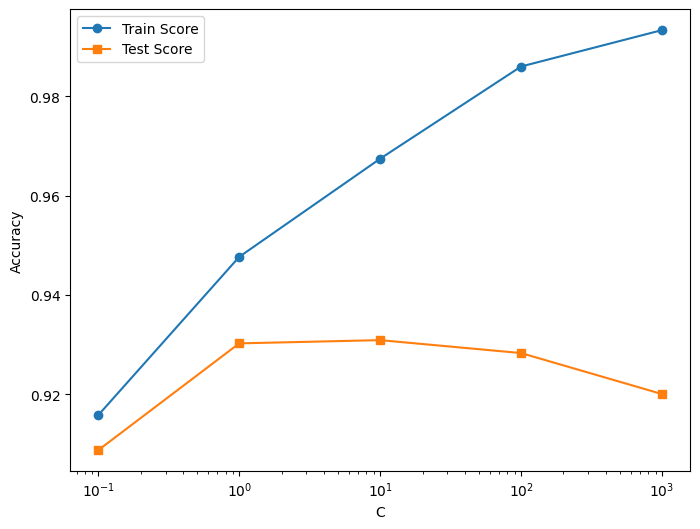

In [24]:
import matplotlib.pyplot as plt

# Extract values of C, train scores, and test scores
C_values = cv_results["param_C"].astype(float)  # Convert C values to float for plotting
train_scores = cv_results["mean_train_score"]
test_scores = cv_results["mean_test_score"]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(C_values, train_scores, label="Train Score", marker='o')
plt.plot(C_values, test_scores, label="Test Score", marker='s')

# Customize the plot
plt.xscale("log")  # Use log scale for C values
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()

# Show the plot
plt.show()


Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if we impose a high cost on the model, it will avoid misclassifying any points by overfitting the data).



Let's finally look at the optimal C values found by GridSearchCV.

In [25]:
# Get the best score from GridSearchCV
best_score = model_cv.best_score_

# Get the best C value from GridSearchCV
best_C = model_cv.best_params_['C']

# Print the results
print("The highest test accuracy is {0} at C = {1}".format(best_score, best_C))


The highest test accuracy is 0.9308844356323467 at C = 10


In [26]:
# Instantiate SVC with the best value of C
model = SVC(C=best_C, random_state=4)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred_rbf1 = model.predict(X_test)


In [27]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rbf1)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[810  39]
 [ 57 475]]


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rbf1)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_rbf1)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred_rbf1)
print("Recall (Sensitivity):", recall)


Accuracy: 0.9304851556842868
Precision: 0.9241245136186771
Recall (Sensitivity): 0.8928571428571429


## Optimising for Other Evaluation Metrics

In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if we are concerned more about catching all spams (positives), we may want to maximise TPR or sensitivity/recall. If, on the other hand, we want to avoid classifying hams as spams (so that any important mails don't get into the spam box), you would maximise the TNR or specificity.





In [31]:
# Specify the range of parameters for C
params = {'C': [0.1, 1, 10, 100, 1000]}

# Specify the scores/metrics for evaluation
scores = ['accuracy', 'precision', 'recall']

# Iterate through each metric in scores
for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))

    # Set up GridSearchCV for the current score metric
    clf = GridSearchCV(
        estimator=SVC(random_state=4),  # SVC model
        param_grid=params,               # Parameter grid with different C values
        cv=5,                            # 5-fold cross-validation
        scoring=score,                   # Use the current score metric
        return_train_score=True          # Return train scores for analysis
    )

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Print the best score and corresponding C value
    print("The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")


# Tuning hyper-parameters for accuracy
The highest accuracy score is 0.9304347826086955 at C = {'C': 10}


# Tuning hyper-parameters for precision
The highest precision score is 0.9402362886104336 at C = {'C': 0.1}


# Tuning hyper-parameters for recall
The highest recall score is 0.9016324173151752 at C = {'C': 10}




In [32]:
# List of all available kernels in SVM
kernels = ['Polynomial', 'RBF', 'Sigmoid', 'Linear']

# Function that returns the corresponding SVC model for different kernels
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernel
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function (RBF) kernel
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernel
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernel
        return SVC(kernel='linear', gamma="auto")
    else:
        raise ValueError("Invalid kernel type")


In [33]:
from sklearn.metrics import classification_report

# Iterate through the range of 4 (for each kernel type)
for i in range(4):

    # Use getClassifier() function to get SVC model with the current kernel
    svclassifier = getClassifier(i)

    # Fit the model on training data
    svclassifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svclassifier.predict(X_test)

    # Get the corresponding kernel used from the kernels list
    kernel_used = kernels[i]

    # Print the kernel used
    print(f"Kernel used: {kernel_used}")

    # Evaluate the model using classification_report
    print(classification_report(y_test, y_pred))
    print("\n")


Kernel used: Polynomial
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       849
           1       0.91      0.20      0.33       532

    accuracy                           0.69      1381
   macro avg       0.79      0.60      0.56      1381
weighted avg       0.76      0.69      0.62      1381



Kernel used: RBF
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



Kernel used: Sigmoid
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       849
           1       0.86      0.87      0.86       532

    accuracy                           0.90      1381
   macro avg       0.89      0.89      0.89      1381
weighted

From above you can see thta rbf krnals gives better prediction result

lets do gridsearch and confirm value of C, gamma and kernel.

`
C= [0.1,1, 10, 100]
gamma= [1,0.1,0.01,0.001]
kernel= ['rbf', 'poly', 'sigmoid']`

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a dictionary for parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize GridSearchCV with SVC, param_grid, refit=True, verbose=2, and return_train_score=True
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, return_train_score=True)

# Fit GridSearchCV on the training data (X_train and y_train)
grid.fit(X_train, y_train)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True, verbose=2)

In [36]:
# Convert cv_results_ into a DataFrame
cv_results = pd.DataFrame(grid.cv_results_)

# Print the cv_results DataFrame
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.558330,0.091051,0.182263,0.050418,0.1,1.0,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.602484,0.605590,...,0.604037,0.001389,46,0.605978,0.609472,0.605590,0.605590,0.606366,0.606599,0.001465
1,0.274093,0.068774,0.017303,0.000622,0.1,1.0,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.913043,0.905280,...,0.911491,0.009870,10,0.995730,0.996118,0.994565,0.995342,0.995730,0.995497,0.000527
2,0.216144,0.038379,0.039871,0.003147,0.1,1.0,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.810559,0.832298,...,0.805590,0.018977,31,0.803571,0.802795,0.771351,0.807842,0.772516,0.791615,0.016166
3,0.357031,0.003913,0.129783,0.034094,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.798137,0.809006,...,0.802484,0.009938,34,0.823758,0.823758,0.817158,0.832686,0.823758,0.824224,0.004943
4,0.360923,0.008268,0.047336,0.003047,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.869565,0.869565,...,0.873913,0.007440,23,0.917314,0.919643,0.914596,0.916925,0.920807,0.917857,0.002177


- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99%
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99%
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*

In [37]:
# Get the optimal accuracy score
best_score = grid.best_score_

# Get the optimal hyperparameters
best_hyperparams = grid.best_params_

# Print the best test score and corresponding hyperparameters
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


The best test score is 0.9335403726708075 corresponding to hyperparameters {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100, kernel=rbf), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Create the model using the optimal hyperparameters
model = SVC(C=best_hyperparams['C'], gamma=best_hyperparams['gamma'], kernel=best_hyperparams['kernel'])

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Print recall/sensitivity
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity:.4f}")


Confusion Matrix:
[[812  37]
 [ 53 479]]
Accuracy: 0.9348
Precision: 0.9283
Sensitivity (Recall): 0.9004


we improved our model by reduced type1 and type 2 errors after hyperparameter tuning.